## Deep Learning, usando [TensorFlow]

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(f'TensorFlow versão: {tf.__version__}')

TensorFlow versão: 2.20.0


### Importando a database

In [5]:
## Vamos primeiro carregar a apostila/database
mnist = keras.datasets.mnist

# Chamamos a função load_data()
# Ela irá retornar duas tuplas
# Primeiro as imagens e rótulos de treino
# Segundo as imagens e rótulos de teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
# Olhar a primeira imagem e seu rótulo para ter certeza.
print(f'\nRótulo da primeira imagem de treino: {train_labels[0]}')


Rótulo da primeira imagem de treino: 5


### Pré-processando

In [7]:
# Pré-processamento
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0
# Dividimos as imagens que são array
# Para conseguirmos trabalhar com números pequenos, 0 a 1

#verificação
print(f'Valor do pixel [0,0] da imagem 1 (Antes): {train_images[0,0,0]}')
print(f'Valor do pixel [0,0] da imagem 1 (Depois): {train_images_normalized[0,0,0]:.4f}')

Valor do pixel [0,0] da imagem 1 (Antes): 0
Valor do pixel [0,0] da imagem 1 (Depois): 0.0000


### Construindo o modelo

In [8]:
print("Definindo as camadas do nosso 'cérebro' digital")

# Criando o contreiner para empilhar as camadas
model = keras.Sequential([
    # Camada 1: Flatten
    # Transforma a imagem 28x28 em um vetor de 784 pixels
    keras.layers.Flatten(input_shape=(28, 28)),

    # Camada 2: Dense
    # 128 neuronios com a função RELU
    keras.layers.Dense(128, activation='relu'),

    # Camada 3: Dense, painel de diagnóstico
    # 10 neurônios (um para cada dígito, 0 a 9)
    keras.layers.Dense(10, activation='softmax')
])

print('\n--- Arquitetura do modelo ---')
model.summary()

Definindo as camadas do nosso 'cérebro' digital

--- Arquitetura do modelo ---


c:\Users\ianfe\OneDrive\Área de Trabalho\Projeto Genese\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compilando o modelo

In [9]:
# Compilando o modelo

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Treinando o modelo

In [10]:
history = model.fit(train_images_normalized, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9266 - loss: 0.2597
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9660 - loss: 0.1138
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0764
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9823 - loss: 0.0581
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9868 - loss: 0.0444


### PROVA FINAL

In [11]:
# Prova final
test_loss, test_acc = model.evaluate(test_images_normalized, test_labels, verbose=2)
print(f"accuracy: {test_acc * 100:.2f}")
print(f"loss: {test_loss:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9764 - loss: 0.0785
accuracy: 97.64
loss: 0.0785


In [ ]:

# 1. RE-DEFINIR a arquitetura do modelo (para começar do zero)
model_long_train = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 2. RE-COMPILAR o modelo
model_long_train.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. 20 epochs
history_long = model_long_train.fit(train_images_normalized, train_labels, epochs=20, validation_split=0.2,verbose=1)

# 4. AVALIAR no conjunto de teste IMEDIATAMENTE após o treino
print("\nAvaliando o modelo de 20 epochs no conjunto de teste...")
test_loss_long, test_acc_long = model_long_train.evaluate(test_images_normalized, test_labels, verbose=2)

print(f"Acurácia FINAL no TREINO (última epoch): {history_long.history['accuracy'][-1] * 100:.2f}%")
print(f"Acurácia no conjunto de TESTE:           {test_acc_long * 100:.2f}%")
print(f"\nLoss FINAL no TREINO (última epoch):   {history_long.history['loss'][-1]:.4f}")
print(f"Loss no conjunto de TESTE:             {test_loss_long:.4f}")

# Comparamos a acurácia final do treino com a acurácia do teste
gap_accuracy = history_long.history['accuracy'][-1] - test_acc_long
if gap_accuracy > 0.02: # Se a diferença for maior que 2% (um valor arbitrário)
    print(f"Overfitting Detectado! A acurácia de treino está {gap_accuracy*100:.2f}% acima da de teste.")
else:
    print("Parece que o overfitting ainda está sob controle.")

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9204 - loss: 0.2813 - val_accuracy: 0.9567 - val_loss: 0.1501
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9628 - loss: 0.1273 - val_accuracy: 0.9668 - val_loss: 0.1128
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9745 - loss: 0.0864 - val_accuracy: 0.9668 - val_loss: 0.1096
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9803 - loss: 0.0660 - val_accuracy: 0.9702 - val_loss: 0.0979
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9853 - loss: 0.0492 - val_accuracy: 0.9719 - val_loss: 0.1006
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9884 - loss: 0.0387 - val_accuracy: 0.9730 - val_loss: 0.0908
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9728 - val_loss: 0.0938
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9922 - loss: 0.0250 - 

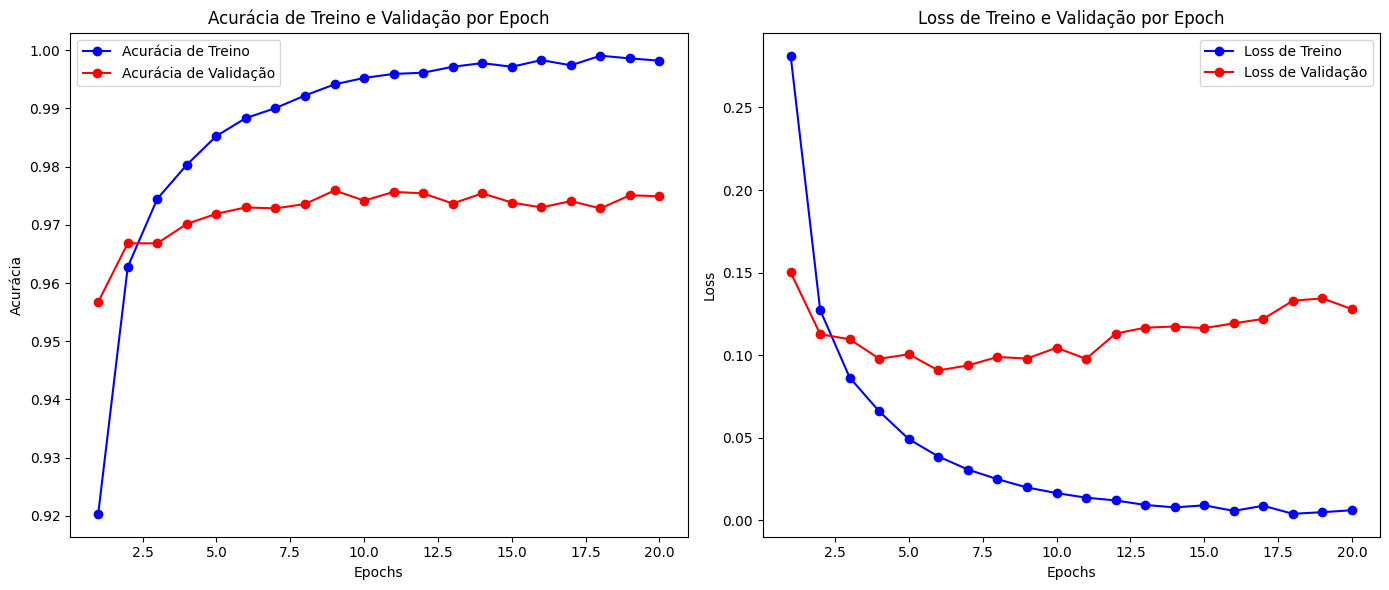


Observe os gráficos:
- A linha AZUL (Treino) deve continuar melhorando (Acc sobe, Loss desce).
- A linha VERMELHA (Validação) é a que importa! O ponto onde ela para de melhorar (ou começa a piorar) indica o início do overfitting.


In [15]:
# gráfico de acurácia

acc = history_long.history['accuracy']
val_acc = history_long.history['val_accuracy']
loss = history_long.history['loss']
val_loss = history_long.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# figura com dois subplots (um para acurácia, um para loss)
plt.figure(figsize=(14, 6))

# Subplot 1: Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo-', label='Acurácia de Treino') # Linha azul com bolinhas
plt.plot(epochs_range, val_acc, 'ro-', label='Acurácia de Validação') # Linha vermelha com bolinhas
plt.title('Acurácia de Treino e Validação por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend()

# Subplot 2: Gráfico da Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Loss de Treino') # Linha azul com bolinhas
plt.plot(epochs_range, val_loss, 'ro-', label='Loss de Validação') # Linha vermelha com bolinhas
plt.title('Loss de Treino e Validação por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('grafico_overfitting.png')
plt.show()

# análise visual (onde as curvas se separam)
print("\nObserve os gráficos:")
print("- A linha AZUL (Treino) deve continuar melhorando (Acc sobe, Loss desce).")
print("- A linha VERMELHA (Validação) é a que importa! O ponto onde ela para de melhorar (ou começa a piorar) indica o início do overfitting.")

### Fazendo predições

In [20]:
# usando o modelo treinado pra fazer predições
predictions_probabilities = model_long_train.predict(test_images_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
#pegando array de 10 probabilidades para a primeira imagem (índice 0)
first_image_probs = predictions_probabilities[0]

#mostra 10 probabilidades (uma para cada dígito, 0 a 9)
print(np.round(first_image_probs, 4))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
# usando np.argmax pra ver qual índice teve maior acerto
predicted_digits = np.argmax(first_image_probs)
print(f'O modelo previu que o dígito é: {predicted_digits}')

O modelo previu que o dígito é: 7


In [23]:
# pegando a resposta real da primeira imagem para comparação
actual_digit = test_labels[0]
print(f'A resposta correta é: {actual_digit}')
if actual_digit == predicted_digits:
    print('A maquina acertou')
else:
    print('a maquina errou')

A resposta correta é: 7
A maquina acertou


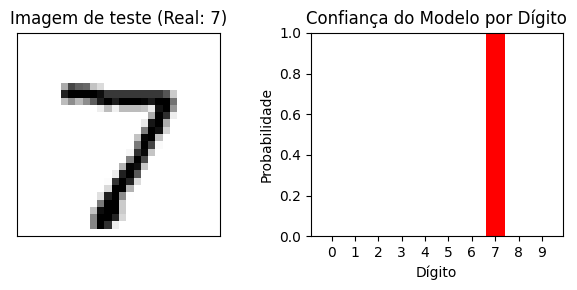

In [24]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title(f"Imagem de teste (Real: {actual_digit})")
plt.xticks([])
plt.yticks([])

# Mostra um gráfico de barras com as probabilidades
plt.subplot(1, 2, 2)
plt.bar(range(10), first_image_probs, color="#777777")
plt.ylim([0, 1])
plt.xticks(range(10)) # Mostra os números 0 a 9 no eixo X
plt.xlabel("Dígito")
plt.ylabel("Probabilidade")
plt.title("Confiança do Modelo por Dígito")
# Destaca a barra do dígito previsto
plt.bar(predicted_digits, first_image_probs[predicted_digits], color='red') 
plt.tight_layout()
plt.show()